In [1]:
import os
import numpy as np
os.environ['NOTEBOOK_MODE'] = '1'
from robustness.tools.vis_tools import show_image_row

from utils import *
from viz_utils import *

from dataset_paths import IMAGENET_PATH, SALIENT_IMAGENET_PATH

In [2]:
class_index = 325
grouping = 'prediction' # can be either: label, prediction, (prediction is used in the paper)

assert ((class_index >= 0) and (class_index < 1000)), class_index

=> loading checkpoint './models/robust_resnet50.pth'
=> loaded checkpoint './models/robust_resnet50.pth' (epoch 105)
******************************************** Description of class: 325 ********************************************
Object name(s): sulphur butterfly, sulfur butterfly
Object supercategory: inverterbrates
Object definition: any of numerous yellow or orange butterflies
Object wikipedia link(s): https://en.wikipedia.org/wiki/Coliadinae
Object images from ImageNet validation set:


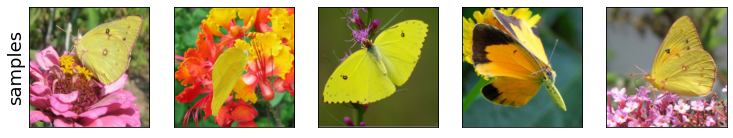

/scratch1/ssingla/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448238472/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


***************************************** Visualization of feature: 1305 ******************************************


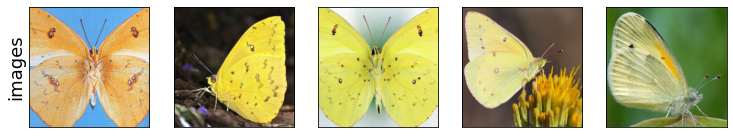

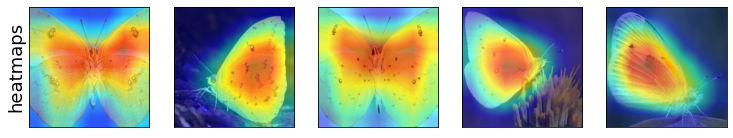

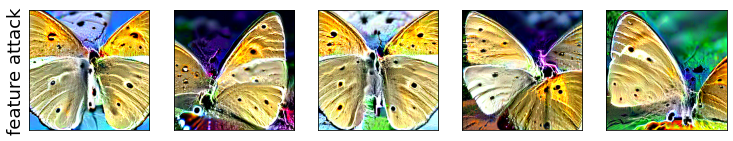

Format => Answer by worker {worker_id}: {main_answer}, {confidence}, {reasons}

Answer by worker 72 : main_object, 4, Focus of the red region in the highlighted visual attributes seems to be within the confines of the main object.
Answer by worker 185 : main_object, 3, Beautiful butterflies are beautifully focused here.
Answer by worker 240 : main_object, 3, It mostly focus on the  ​yellow or orange butterflies wings
Answer by worker 5 : main_object, 3, Highlighted visual attributes shows the red region It Mostly focus on the yellow or orange butterflies wings
Answer by worker 192 : main_object, 5, Focus is on the butterfly

Final annotation: core, votes for core: 5, votes for spurious: 0
****************************************** Visualization of feature: 604 ******************************************


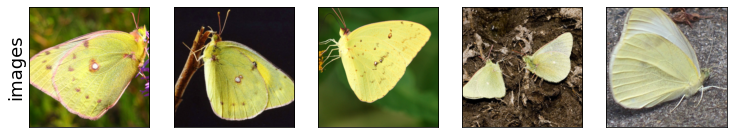

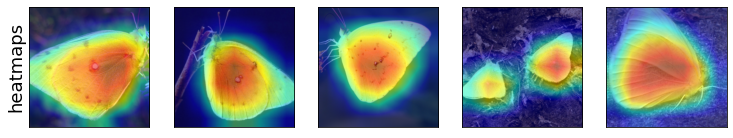

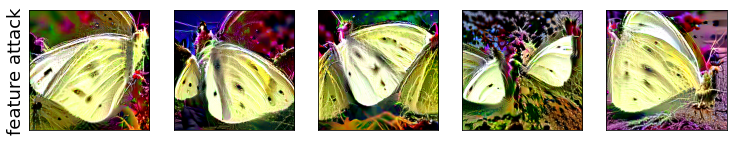

Format => Answer by worker {worker_id}: {main_answer}, {confidence}, {reasons}

Answer by worker 146 : main_object, 4, All the above images , focusing on some part of the main object.
Answer by worker 185 : main_object, 3, Beautiful butterflies are beautifully focused.
Answer by worker 125 : main_object, 5, The red region in the Highlighted visual attributes focuses on the wings of a sulphur butterfly.
Answer by worker 115 : main_object, 5, Because the focus of the red color was at least somewhat on the main object in the highlighted visual attributes.
Answer by worker 188 : main_object, 5, Heat map suggest that the focus is on butterfly wing

Final annotation: core, votes for core: 5, votes for spurious: 0
***************************************** Visualization of feature: 1797 ******************************************


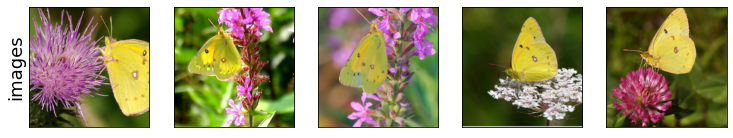

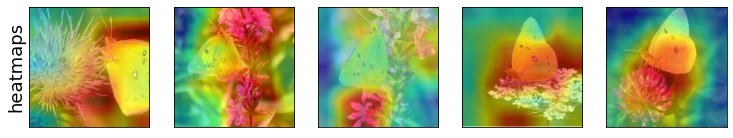

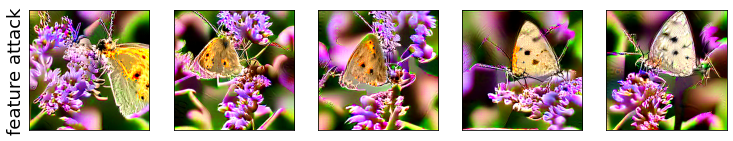

Format => Answer by worker {worker_id}: {main_answer}, {confidence}, {reasons}

Answer by worker 233 : separate_object, 2, Focus is on the flower
Answer by worker 54 : main_object, 4, Although some part of the red regions reaches the background of the main object. But in all the images, the red regions are focusing the main object. So, I am fairly confident with the third option.
Answer by worker 188 : background, 4, Heat map suggest the focus is on background that's flowers
Answer by worker 185 : separate_object, 3, Red focus is on the flowers.
Answer by worker 27 : separate_object, 5, Most of the images are mainly focused on flowers not a butterfly.

Final annotation: spurious, votes for core: 1, votes for spurious: 4
****************************************** Visualization of feature: 595 ******************************************


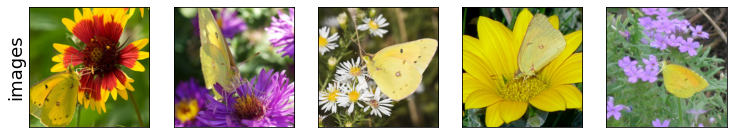

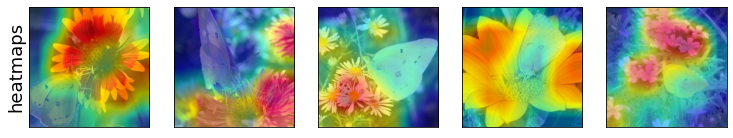

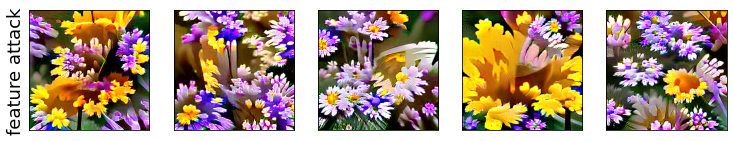

Format => Answer by worker {worker_id}: {main_answer}, {confidence}, {reasons}

Answer by worker 150 : separate_object, 5, The focus is on a flower and not the main object which is a butterfly.
Answer by worker 185 : separate_object, 3, Red focus is on the flowers.
Answer by worker 186 : separate_object, 5, Focus is not  set on main object butterfly .
Answer by worker 125 : background, 4, The red region in the Highlighted visual attributes focuses on the background of a sulphur butterfly.
Answer by worker 124 : background, 5, The focus in first two images is on the sulphur butterflyand in third the focus is on the background of an sulphur butterflyand.

Final annotation: spurious, votes for core: 0, votes for spurious: 5
***************************************** Visualization of feature: 1582 ******************************************


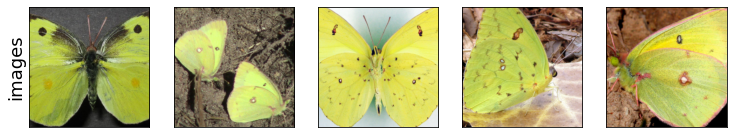

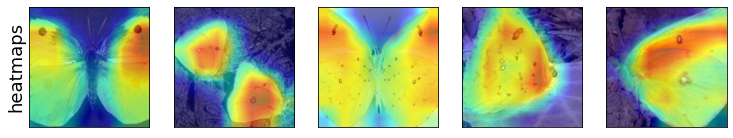

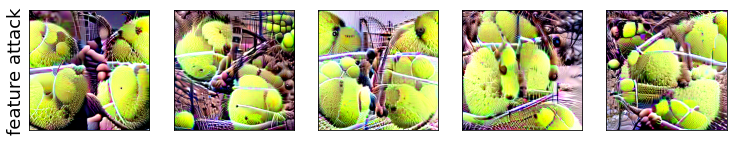

Format => Answer by worker {worker_id}: {main_answer}, {confidence}, {reasons}

Answer by worker 176 : main_object, 5, The main object is an sulphur butterfly. The focus of the red region in the highlighted visual attributes is on the butterfly's body and wings, showing their main parts. Because of that, I choose focus is on some part of the main object.
Answer by worker 229 : main_object, 5, The focus of the red region in the Highlighted visual attributes is on the wings of the butterfly.
Answer by worker 125 : main_object, 4, The red region in the Highlighted visual attributes focuses on the wings of a sulphur butterfly.
Answer by worker 160 : main_object, 5, The highlighted visual attribute is on the butterfly in every image mainly targeting the colored wings of the insect.
Answer by worker 188 : main_object, 4, Focus is on wings of butterfly

Final annotation: core, votes for core: 5, votes for spurious: 0


In [3]:
robust_model = load_robust_model(IMAGENET_PATH)

print_with_stars(' Description of class: {:d} '.format(class_index))

class_df = pd.read_csv('class_metadata.csv', index_col = 'class_index')
row = class_df.iloc[[class_index]].to_dict(orient='records')[0]
print('Object name(s): {:s}'.format(row['synset']))
print('Object supercategory: {:s}'.format(row['supercategory']))
print('Object definition: {:s}'.format(row['gloss']))

wikilinks = eval(row['wikilinks'])
wikilinks_str = ''
for wikilink in wikilinks:
    wikilinks_str += str(wikilink) + ', '
wikilinks_str = wikilinks_str[:-2]
print('Object wikipedia link(s): {:s}'.format(wikilinks_str))

print('Object images from ImageNet validation set:')
val_sample_paths = eval(row['val_sample_paths'])
wordnet_id = row['wordnet_id']
val_folder_path = os.path.join(IMAGENET_PATH, 'val', str(wordnet_id))
val_sample_images = load_images_fnames(val_sample_paths, val_folder_path)
show_image_row([val_sample_images], ['samples'], tlist=[], fontsize=18)

if grouping == 'label':
    train_labels = np.load('metadata/train_labels.npy')
    all_indices = np.nonzero(train_labels == class_index)[0]
elif grouping == 'prediction':
    train_preds = np.load('metadata/train_preds.npy')
    all_indices = np.nonzero(train_preds == class_index)[0]
else:
    raise ValueError('Unknown grouping: {:s}. Must be either: prediction/label.'.format(grouping))
imagenet_subset = ImageNetSubset(IMAGENET_PATH, all_indices)
robust_features = generate_features(robust_model, imagenet_subset, batch_size=64)
topk_feature_indices = topk_predictive_features(class_index, robust_model, robust_features, k=5)

csv_path = 'mturk_results/discover_spurious_features.csv'
mturk_results_discover = MTurk_Results(csv_path)
answers_dict = mturk_results_discover.answers_dict

for feature_index in topk_feature_indices:
    sorted_indices = np.argsort(-robust_features[:, feature_index])
    max_5_indices = sorted_indices[:5]

    images, heatmaps, feature_attacks = create_images(max_5_indices, feature_index, imagenet_subset, robust_model)

    print_with_stars(' Visualization of feature: {:d} '.format(feature_index))
    show_image_row([images], ['images'], tlist=[], fontsize=18)
    show_image_row([heatmaps], ['heatmaps'], tlist=[], fontsize=18)
    show_image_row([feature_attacks], ['feature attack'], tlist=[], fontsize=18)

    key = str(class_index) + '_' + str(feature_index)
    if key in answers_dict:
        answers = answers_dict[key]
        core_votes, spurious_votes = 0, 0

        print('Format => Answer by worker {worker_id}: {main_answer}, {confidence}, {reasons}\n')
        for answer in answers:
            worker_id, main_ans, conf, reasons = answer
            if main_ans == 'main_object':
                core_votes += 1
            else: 
                spurious_votes += 1
            print('Answer by worker {:d} : {:s}, {:d}, {:s}'.format(worker_id, main_ans, int(conf), reasons))

        final_ans = 'core' if core_votes >= 3 else 'spurious'    
        print('\nFinal annotation: {:s}, votes for core: {:d}, votes for spurious: {:d}'.format(
              final_ans, core_votes, spurious_votes))
    else:
        print('feature {:d} not annotated by workers, select from : {:s}'.format(
              feature_index, str(annotated_features)))